Import dan Load Data

In [ ]:
import tensorflow as tf
import cv2
import numpy as np
from matplotlib import pyplot as plt 

data_dir = r"D:\Logo GK dan UAJY\TUbes vgg16\Train_Data_Tubes" 



data = tf.keras.utils.image_dataset_from_directory(data_dir, seed = 123, image_size=(180,180), batch_size=16)
print(data.class_names)

class_names = data.class_names

Found 300 files belonging to 3 classes.
['Beras', 'Gandum', 'Sorgum']


Load Dataset dari direktori

In [14]:
img_size = 180
batch = 32
validation_split = 0.1
dataset = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    seed = 123,
    image_size = (img_size, img_size),
    batch_size = batch,
)

Found 300 files belonging to 3 classes.


Datset split

In [15]:
total_count = len (dataset)
val_count = int(total_count * validation_split)
train_count = total_count - val_count

print("Total Images: ", total_count)
print("Train Images: ", train_count)
print("Validation Images: ", val_count)

train_ds = dataset.take(train_count)
val_ds = dataset.skip(train_count)

Total Images:  10
Train Images:  9
Validation Images:  1


Visualisasi Gambar

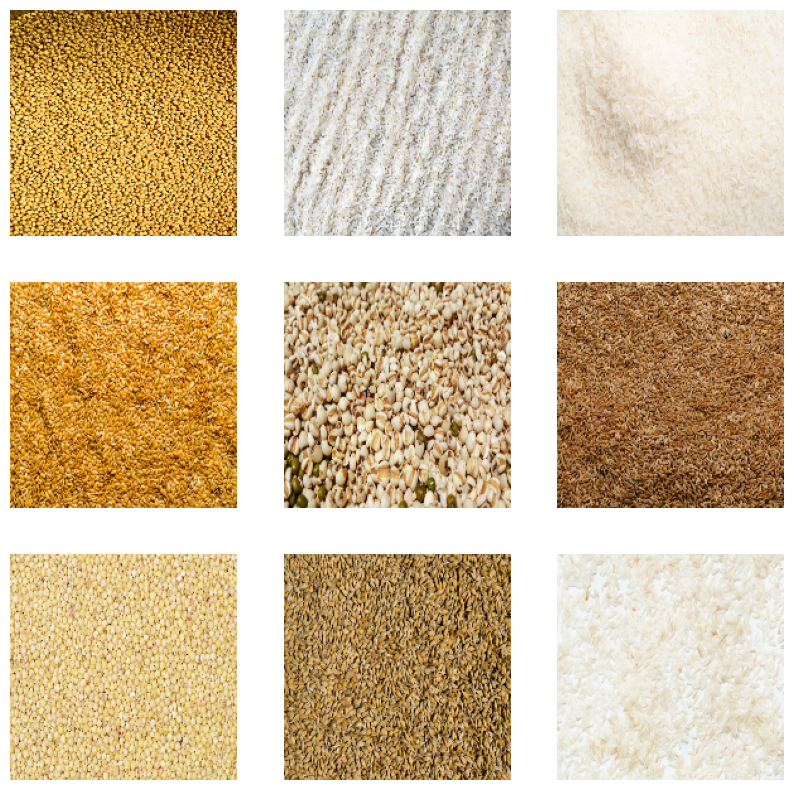

In [17]:
import matplotlib.pyplot as plt

i = 0
plt.figure(figsize=(10,10))


for images, labels in train_ds.take(1):
    for i in range(9):
        plt.subplot(3,3, i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.axis('off')
        



Melakukan augmentasi data

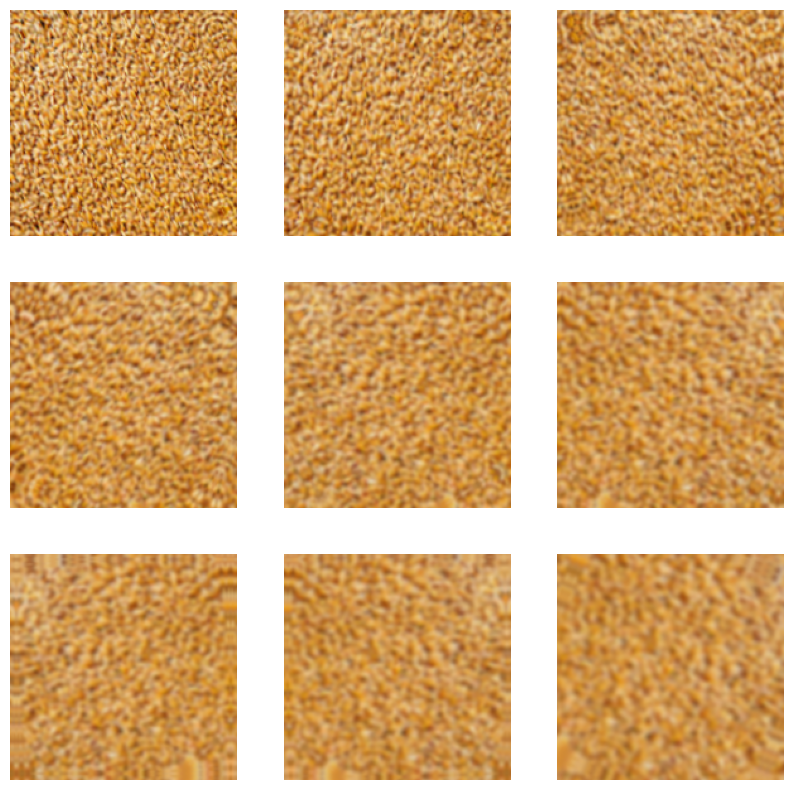

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, load_model

Tuner = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = Tuner)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size = Tuner)



data_augmentation = Sequential([
    layers.RandomFlip('horizontal', input_shape = (img_size,img_size,3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1)
])

i = 0
plt.figure(figsize=(10,10))

for images, labels in train_ds.take(69):
    for i in range(9):
        images = data_augmentation(images)
        plt.subplot(3,3, i+1)
        plt.imshow(images[0].numpy().astype('uint8'))
        plt.axis('off')

Buat Model VGG-16 Manual

In [19]:
import tensorflow as tf
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPool2D, Flatten, Dense, Dropout

def vgg16(input_shape, n_classes):
    input = Input(input_shape)
    
    
    x = Conv2D(64, (3, 3), activation='relu', padding='same')(input)
    x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = MaxPool2D((2, 2), strides=2)(x)
    
    
    x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = MaxPool2D((2, 2), strides=2)(x)
    
    
    x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
    x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
    x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
    x = MaxPool2D((2, 2), strides=2)(x)
    
    
    x = Conv2D(512, (3, 3), activation='relu', padding='same')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same')(x)
    x = MaxPool2D((2, 2), strides=2)(x)
    
    
    x = Conv2D(512, (3, 3), activation='relu', padding='same')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same')(x)
    x = MaxPool2D((2, 2), strides=2)(x)
    
    
    x = Flatten()(x)
    x = Dense(512, activation='relu')(x)
    x = Dropout(0.5)(x)
    x = Dense(256, activation='relu')(x)
    x = Dropout(0.5)(x)
    output = Dense(n_classes, activation='softmax')(x)
    
    model = Model(input, output)
    return model


input_shape = (180, 180, 3)  
n_classes = 3                


model = vgg16(input_shape, n_classes)


model.summary()


Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_26 (Conv2D)              │ (None, 180, 180, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_27 (Conv2D)              │ (None, 180, 180, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 90, 90, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_28 (Conv2D)              │ (None, 90, 90, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_29 (Conv2D)              │ (None, 90, 90, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 45, 45, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_30 (Conv2D)              │ (None, 45, 45, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_31 (Conv2D)              │ (None, 45, 45, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_32 (Conv2D)              │ (None, 45, 45, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 22, 22, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_33 (Conv2D)              │ (None, 22, 22, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_34 (Conv2D)              │ (None, 22, 22, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_35 (Conv2D)              │ (None, 22, 22, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 11, 11, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_36 (Conv2D)              │ (None, 11, 11, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_37 (Conv2D)              │ (None, 11, 11, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_38 (Conv2D)              │ (None, 11, 11, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 5, 5, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 12800)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 512)            │     6,554,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 3)              │           77

 Total params: 21,400,899 (81.64 MB)

 Trainable params: 21,400,899 (81.64 MB)

 Non-trainable params: 0 (0.00 B)

Melatih Data

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam


model.compile(
    optimizer=Adam(),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

early_stopping = EarlyStopping(monitor='val_accuracy', 
                               patience=10, 
                               mode='max')

history= model.fit(train_ds, 
                   epochs=50, 
                   validation_data=val_ds, 
                   callbacks=[early_stopping])

Epoch 1/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 103s 9s/step - accuracy: 0.3482 - loss: 1.0977 - val_accuracy: 0.1667 - val_loss: 1.1036
Epoch 2/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 76s 8s/step - accuracy: 0.3196 - loss: 1.0987 - val_accuracy: 0.4167 - val_loss: 1.1007
Epoch 3/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 72s 8s/step - accuracy: 0.3145 - loss: 1.0983 - val_accuracy: 0.4167 - val_loss: 1.1008
Epoch 4/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 74s 8s/step - accuracy: 0.3433 - loss: 1.0981 - val_accuracy: 0.4167 - val_loss: 1.1011
Epoch 5/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 84s 9s/step - accuracy: 0.3290 - loss: 1.0989 - val_accuracy: 0.1667 - val_loss: 1.1010
Epoch 6/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 87s 10s/step - accuracy: 0.3807 - loss: 1.0986 - val_accuracy: 0.4167 - val_loss: 1.1000
Epoch 7/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 93s 10s/step - accuracy: 0.3475 - loss: 1.1625 - val_accuracy: 0.1667 - val_loss: 1.1001
Epoch 8/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 90s 10s/step - accuracy: 0.2998 - loss: 1.0996 - val_accuracy: 0.1667 - val_loss: 1.1007
Epoc

Memvisualisasikan Hasil Pelatihan Data

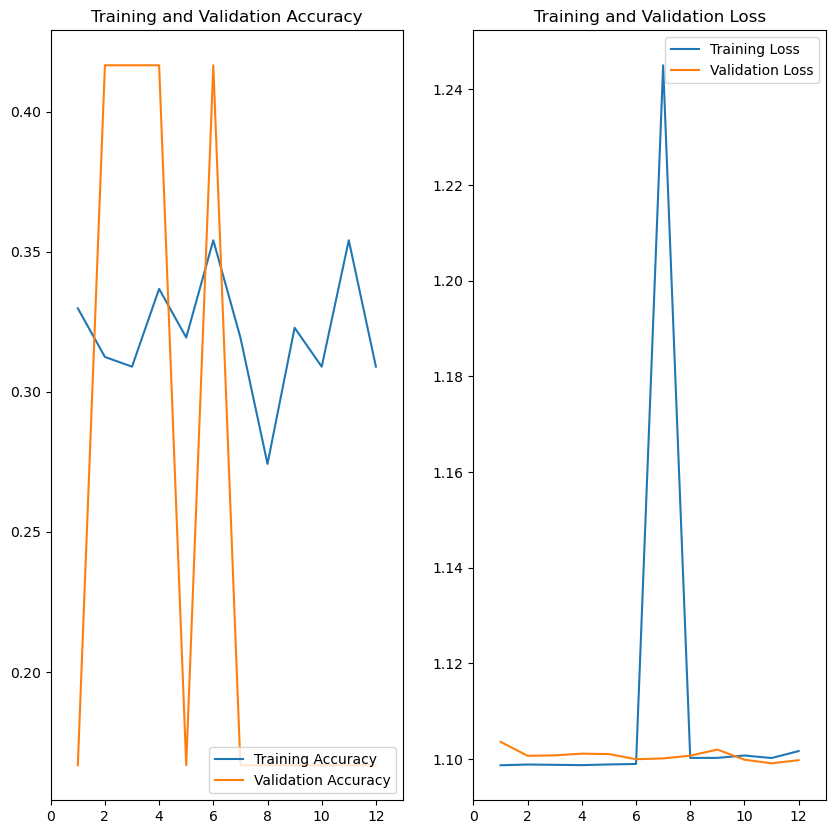

In [30]:

ephocs_range = range(1, len(history.history['loss']) + 1)

plt.figure(figsize=(10, 10)) 


plt.subplot(1, 2, 1) 
plt.plot(ephocs_range, history.history['accuracy'], label='Training Accuracy') 
plt.plot(ephocs_range, history.history['val_accuracy'], label='Validation Accuracy') 
plt.legend(loc='lower right') 
plt.xlim(0, 13) 
plt.title('Training and Validation Accuracy') 


plt.subplot(1, 2, 2)
plt.plot(ephocs_range, history.history['loss'], label='Training Loss')
plt.plot(ephocs_range, history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.xlim(0, 13)
plt.title('Training and Validation Loss')
plt.show()

Save Model

In [31]:
model.save('vgg-16.h5')

Test Klasifikasikan Gambar

In [32]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from PIL import Image


model_path = r'D:\Logo GK dan UAJY\TUbes vgg16\vgg-16.h5'
model = load_model(model_path)  
print("Model loaded successfully.")


class_names = ['Beras', 'Gandum', 'Sorgum']
print("Class names:", class_names)


def classify_images(image_path, save_path='predicted_image.jpg'):
    try:
        
        input_image = tf.keras.utils.load_img(image_path, target_size=(180, 180))  
        input_image_array = tf.keras.utils.img_to_array(input_image)  
        input_image_array = input_image_array / 255.0  
        input_image_exp_dim = tf.expand_dims(input_image_array, 0)  
        
        
        print(f"Input image shape: {input_image_array.shape}")
        print(f"Image normalized: Min={np.min(input_image_array)}, Max={np.max(input_image_array)}")

        
        predictions = model.predict(input_image_exp_dim)
        print(f"Raw predictions: {predictions}")
        
        
        class_idx = np.argmax(predictions[0])  
        confidence = np.max(predictions[0]) * 100  

        
        print(f"Prediksi: {class_names[class_idx]}")
        print(f"Confidence: {confidence:.2f}%")

        
        input_image = Image.open(image_path)
        input_image.save(save_path)
        print(f"Original image saved to {save_path}")

        
        return f"Prediksi: {class_names[class_idx]} dengan confidence {confidence:.2f}%. Gambar asli disimpan di {save_path}."
    except Exception as e:
        return f"Terjadi kesalahan: {e}"


image_path = r'D:\Logo GK dan UAJY\TUbes vgg16\Train_Data_Tubes\Beras\Beras 2.jpg'
save_path = 'Beras_2_predicted.jpg'
result = classify_images(image_path, save_path=save_path)
print(result)


Model loaded successfully.
Class names: ['Beras', 'Gandum', 'Sorgum']
Input image shape: (180, 180, 3)
Image normalized: Min=0.0, Max=0.9882352948188782
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Raw predictions: [[0.3329767  0.33194458 0.33507863]]
Prediksi: Sorgum
Confidence: 33.51%
Original image saved to Beras_2_predicted.jpg
Prediksi: Sorgum dengan confidence 33.51%. Gambar asli disimpan di Beras_2_predicted.jpg.


Confusion Matrix

Found 30 files belonging to 3 classes.


1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step


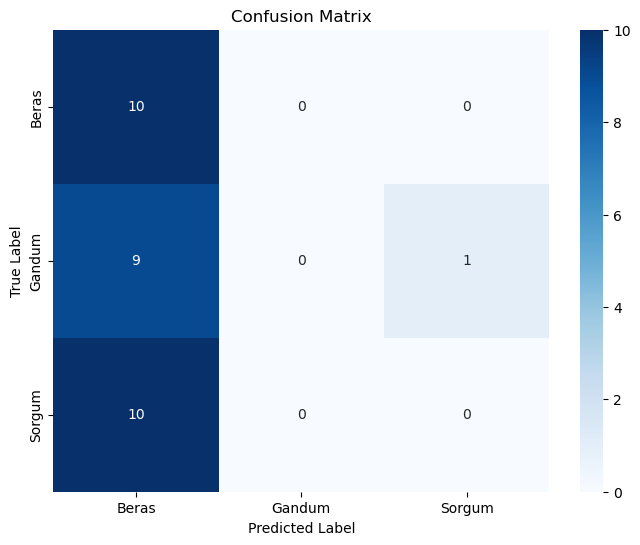


Evaluation Metrics:
Confusion Matrix:
 [[10  0  0]
 [ 9  0  1]
 [10  0  0]]

Accuracy: 0.3333333333333333

Precision for each class: [0.34482759        nan 0.        ]
Recall for each class: [1. 0. 0.]
F1 Score for each class: [0.51282051        nan        nan]

Class-specific accuracies:
Beras: 1.0000
Gandum: 0.0000
Sorgum: 0.0000


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import load_model
import seaborn as sns
import matplotlib.pyplot as plt


test_data = tf.keras.preprocessing.image_dataset_from_directory(
    r'D:\Logo GK dan UAJY\TUbes vgg16\Test_Data_Tubes',
    labels='inferred',
    label_mode='categorical',  
    batch_size=32,
    image_size=(180, 180)
)


y_pred = model.predict(test_data)
y_pred_class = tf.argmax(y_pred, axis=1)


true_labels = []
for _, labels in test_data:
    true_labels.extend(tf.argmax(labels, axis=1).numpy())
true_labels = tf.convert_to_tensor(true_labels)


conf_mat = tf.math.confusion_matrix(true_labels, y_pred_class)


accuracy = tf.reduce_sum(tf.linalg.diag_part(conf_mat)) / tf.reduce_sum(conf_mat)
precision = tf.linalg.diag_part(conf_mat) / tf.reduce_sum(conf_mat, axis=0)
recall = tf.linalg.diag_part(conf_mat) / tf.reduce_sum(conf_mat, axis=1)
f1_score = 2 * (precision * recall) / (precision + recall)


plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat.numpy(), 
            annot=True, 
            fmt='d', 
            cmap='Blues',
            xticklabels=["Beras", "Gandum", "Sorgum"],
            yticklabels=["Beras", "Gandum", "Sorgum"])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


print("\nEvaluation Metrics:")
print("==================")
print("Confusion Matrix:\n", conf_mat.numpy())
print("\nAccuracy:", accuracy.numpy())
print("\nPrecision for each class:", precision.numpy())
print("Recall for each class:", recall.numpy())
print("F1 Score for each class:", f1_score.numpy())


class_accuracies = tf.linalg.diag_part(conf_mat) / tf.reduce_sum(conf_mat, axis=1)
print("\nClass-specific accuracies:")
for i, class_name in enumerate(["Beras", "Gandum", "Sorgum"]):
    print(f"{class_name}: {class_accuracies[i].numpy():.4f}")